# BIKE RENTALS

### Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import calendar
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

### Importing the dataset

In [3]:
df = pd.read_csv('C:\\Users\\Anay Panshikar\\Desktop\\Aero IITB\\Big data analysis\\data.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Checking the Information from the data set like the shape, info and description

In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Checking the null values in the dataset

In [8]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### There are no null values in the dataset.

### Checking for the datatypes in the all the columns

In [9]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### All the columns are numerical expect one which is dteday which is object

### Dropping the duplicates if present in the data set

In [10]:
df.drop_duplicates(subset = None, inplace = True)

In [11]:
df.shape

(730, 16)

#### There are no duplicates in the dataset

The shape of the data set df before and after dropping the duplicates is same.
Hence there are no duplicates in the dataset

### Checking the value counts of all the columns

In [12]:
for i in df.columns:
    print(df[i].value_counts(ascending=False).head(15), '\n\n')

730    1
251    1
249    1
248    1
247    1
246    1
245    1
244    1
243    1
242    1
241    1
240    1
239    1
238    1
237    1
Name: instant, dtype: int64 


23-07-2019    1
11-03-2018    1
01-09-2019    1
23-10-2018    1
16-06-2018    1
25-09-2018    1
11-05-2018    1
10-09-2019    1
07-10-2019    1
28-11-2019    1
21-04-2019    1
11-06-2018    1
11-11-2018    1
03-03-2019    1
06-01-2019    1
Name: dteday, dtype: int64 


3    188
2    184
1    180
4    178
Name: season, dtype: int64 


1    365
0    365
Name: yr, dtype: int64 


12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64 


0    709
1     21
Name: holiday, dtype: int64 


6    105
1    105
0    105
5    104
4    104
2    104
3    103
Name: weekday, dtype: int64 


1    499
0    231
Name: workingday, dtype: int64 


1    463
2    246
3     21
Name: weathersit, dtype: int64 


10.899153    5
26.035000    5
23.130847    4
28.563347    4
27

### Summary of the columns

1. Each Instants value is different and it is just representing the index
2. Each dteday value is different and the values represent the date
3. Season has 4 varieties where each numerical represents different season
4. Yr column has 2 varieties which is 2018 and 2019
5. mnth has 12 different values which refer the 12 months of a year
6. Holiday has 2 different values, 0 for non holiday and 1 for Holiday
7. Weekday has 7 different values which represent 7 different days in a week
8. Working day has 2 values if the day is a working day or not
9. weathersit has 3 different values which are 1 - Clear, 2- Mist+Cloudy, 3- Light snow
10. temp is a continuous variable which referes to the temperature in Celsius
11. atemp is a continuous variable which referes to the feels like temperature in Celsius
12. hum is a continuous variable details about humidity
13. windspeed is a continuous variable details about windspeed
14. casual, registered and counts of casual users and registered users
15. cnt is sum of Casual users and registered users.

#### Changing the weekday column, as the values are started as 6 as monday and 0 as tuesday but from 2019 March it is observed that 0 is Monday, So using the calander and datetime functions of python, changed the values to original

In [13]:
df['weekday'] = df['dteday'].apply(lambda x:calendar.day_name[datetime.strptime(x, '%d-%m-%Y').weekday()])
df['weekday'].replace(('Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'),(0,1,2,3,4,5,6),inplace = True)

### Keeping the original dataframe for future reference, creating a new dataframe df1 from now on for the analysis

### Removing the columns which are not useful for the analysis

1. Instants are not useful for the analysis as they are just indices
2. date is already separated as month and year in spearate columns, hence removing the dtedate column as well
3. Casual and registered are collectively written in cnt column hence removing those columns also

In [14]:
df1 = df.drop(columns = ['instant','dteday','casual','registered'])

In [15]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,1,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,2,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,3,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,4,1,1,9.305237,11.46350,43.6957,12.522300,1600


### The data contains few categorical columns identifying those and perform one hot encoding on those columns which are necessary

1. year has 0 and 1 which can be distinguished
2. mnth ahs 1-12 different values which should be convereted to 11 different columns by using dummies
3. holiday can take 0 and 1 values only which can be distingushed so no need to convert to multiple columns
4. weekday has 0-6 values so it has to be converted to 6 different columns by using dummies
5. weathersit has 1-3 values, should be converted to 2 different columns using dummies
6. season can take 4 values, should be converted to 3 different columns using dummies 
6. rest other columns are numerical data.

## Exploratory Data Analysis

### Writing down the actual meanings of numbers in categorical columns and plotting the Univariate Plots

In [16]:
df1['season'].replace((1,2,3,4),('Spring','Summer','Fall','Winter'), inplace = True)
df1['yr'].replace((0,1),('2018','2019'),inplace = True)
df1['mnth'].replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace = True)
df1['holiday'].replace((0,1),('Not a Holiday','Holiday'), inplace = True)
df1['weekday'].replace((0,1,2,3,4,5,6),('Mon','Tue','Wed','Thu','Fri','Sat','Sun'), inplace = True)
df1['weathersit'].replace((1,2,3,4),('Clear','Mist+Cloudy','Light Snow','Heavy Rain'), inplace = True)
df1['workingday'].replace((0,1),('Non Working Day','Working Day'), inplace = True)
df1

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,Jan,Not a Holiday,Mon,Non Working Day,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,2018,Jan,Not a Holiday,Tue,Non Working Day,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,2018,Jan,Not a Holiday,Wed,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,2018,Jan,Not a Holiday,Thu,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,2018,Jan,Not a Holiday,Fri,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,Spring,2019,Dec,Not a Holiday,Fri,Working Day,Mist+Cloudy,10.420847,11.33210,65.2917,23.458911,2114
726,Spring,2019,Dec,Not a Holiday,Sat,Working Day,Mist+Cloudy,10.386653,12.75230,59.0000,10.416557,3095
727,Spring,2019,Dec,Not a Holiday,Sun,Non Working Day,Mist+Cloudy,10.386653,12.12000,75.2917,8.333661,1341
728,Spring,2019,Dec,Not a Holiday,Mon,Non Working Day,Clear,10.489153,11.58500,48.3333,23.500518,1796


### Univariate Analysis on Categorical Columns

In [17]:
# copying the categorical columns in a list
Categorical_colms = ['season','yr','mnth','holiday','weekday','workingday','weathersit']

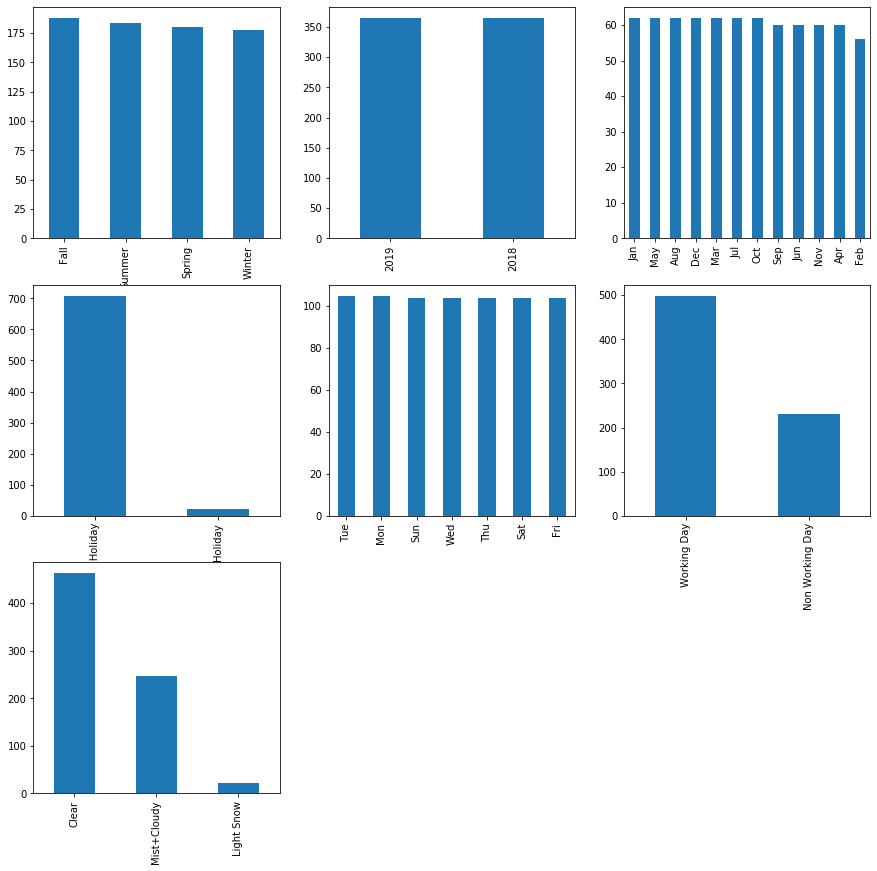

In [18]:
#plotting bar charts of the categorical columns
plt.figure(figsize = (15,40))
for col in range (len(Categorical_colms)):
    plt.subplot(8,3,col+1)
    df1[Categorical_colms[col]].value_counts().plot.bar()

#### Inferences from above graphs

1. The seasons are equally distributed
2. The number of days in 2018 and 2019 provided are same
3. The days in months are same
4. There are very less Holidays from the bar char. It is obvious the non holidays are more
5. It is also obvious that working days are more than non working days
6. Most of the days are Clear than Mist+Cloudy than Light Snow

### Univariate Analysis on Numerical Columns

In [19]:
# copying the numerical columns in a list
numeric_colms = ['temp','atemp','hum','windspeed','cnt']

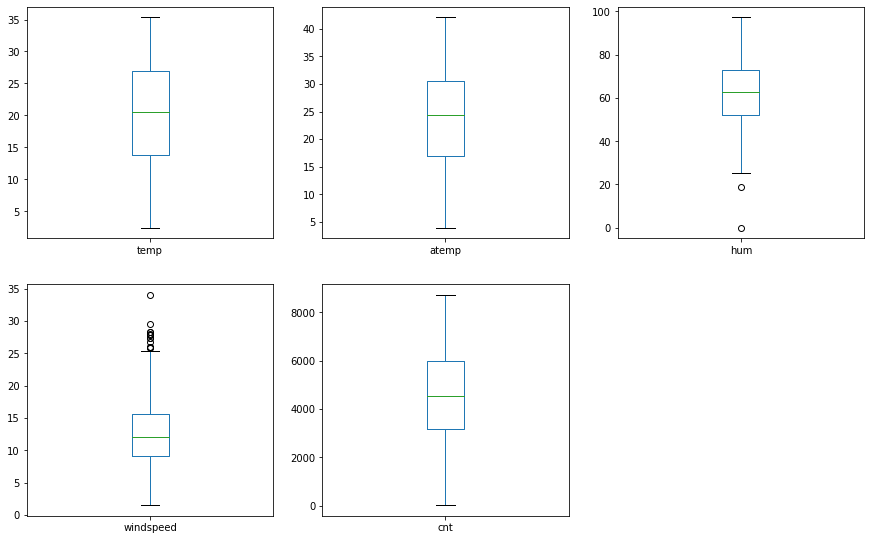

In [20]:
#plotting the box plots of numerical columns
plt.figure(figsize = (15,40))
for i in range(len(numeric_colms)):
    plt.subplot(8,3,i+1)
    df1[numeric_colms[i]].plot.box()

#### Inferences from above box plots

1. Temp and atemp columns are similar
2. hum changes from 0 to 100 with median is near to 60
3. windspeed varies from 0 to 35 with median of around 12
4. cnt varies from 0 to 8000 with median of nearly 4500

### Segmented Univariate Analysis

Since the target column is cnt we try to find out the categorical variables that affect the cnt column

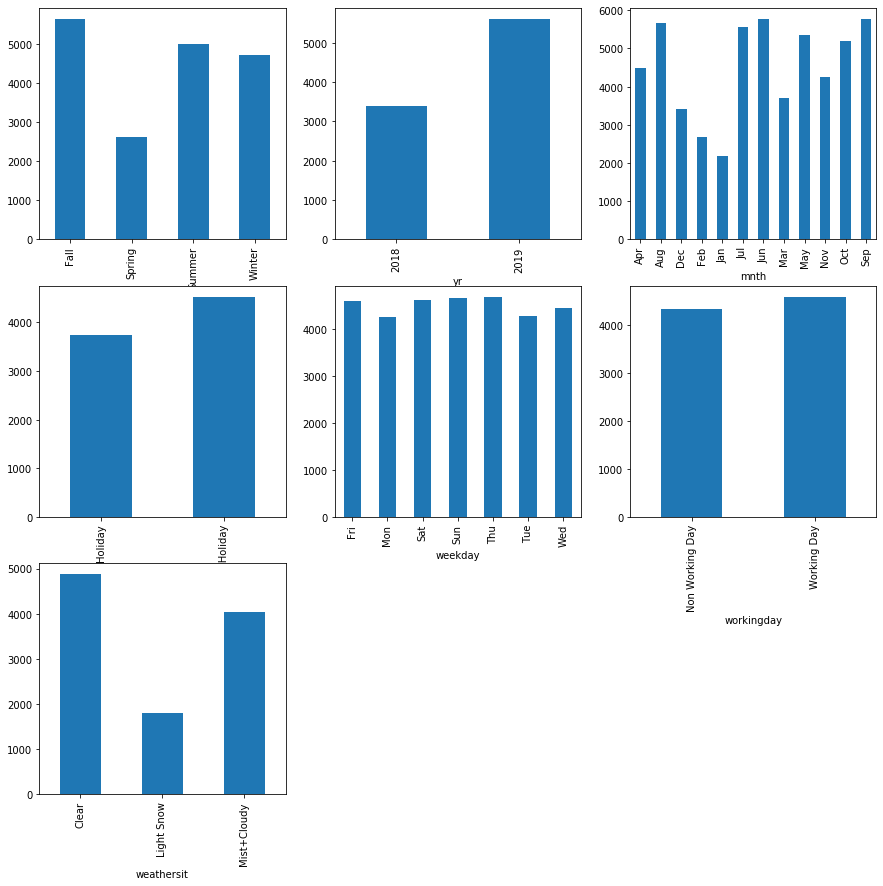

In [21]:
# Plotting the variation of mean of cnt wrt to each of the category in each categorical variable
plt.figure(figsize = (15,40))
for i in range(0,len(Categorical_colms)):
    plt.subplot(8,3,i+1)
    df1.groupby(Categorical_colms[i])['cnt'].mean().plot.bar()

#### Inferences from the above graphs

1. In an average most bike rentals are taken in Fall season than any other season
2. In an average most bike rentals are taken in 2019.
3. As we have seen the fall season average, the months that have highest avg are to be June, July, August, September and very low avg in Dec, Jan, Feb
4. Bike rentals are highly taken on holidays
5. By Weekday and Working day we cannot make any conclusions
6. When weather is clear the rentals are high and if there is light snow also people mostly avoid bike rentals

### Bivariate Analysis on Numeric columns

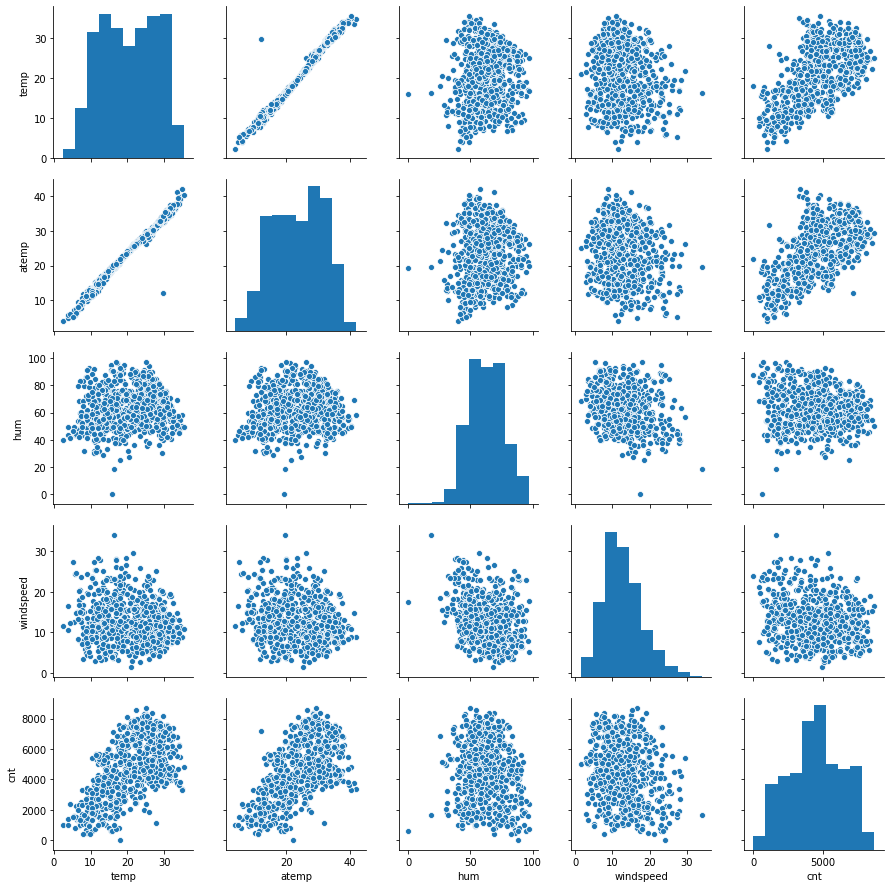

In [22]:
# Plotting the pairplot to check if there are any correlations visible.
sns.pairplot(df1[numeric_colms])

#### Inferences from the Pairplot

1. Temp and atemp are highly correlated linearly.
2. Temp is correlated with cnt which is good sign that we can apply Linear regression and get results.

#### Creating the dummy Variables for the categorical columns

In [23]:
df1 = pd.get_dummies(df1, drop_first=True)

In [24]:
df1

,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,...,holiday_Not a Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working Day,weathersit_Light Snow,weathersit_Mist+Cloudy
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,10.420847,11.33210,65.2917,23.458911,2114,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
726,10.386653,12.75230,59.0000,10.416557,3095,1,0,0,1,0,...,1,0,1,0,0,0,0,1,0,1
727,10.386653,12.12000,75.2917,8.333661,1341,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1
728,10.489153,11.58500,48.3333,23.500518,1796,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0


### Now Check for correlations between the columns using Heatmap

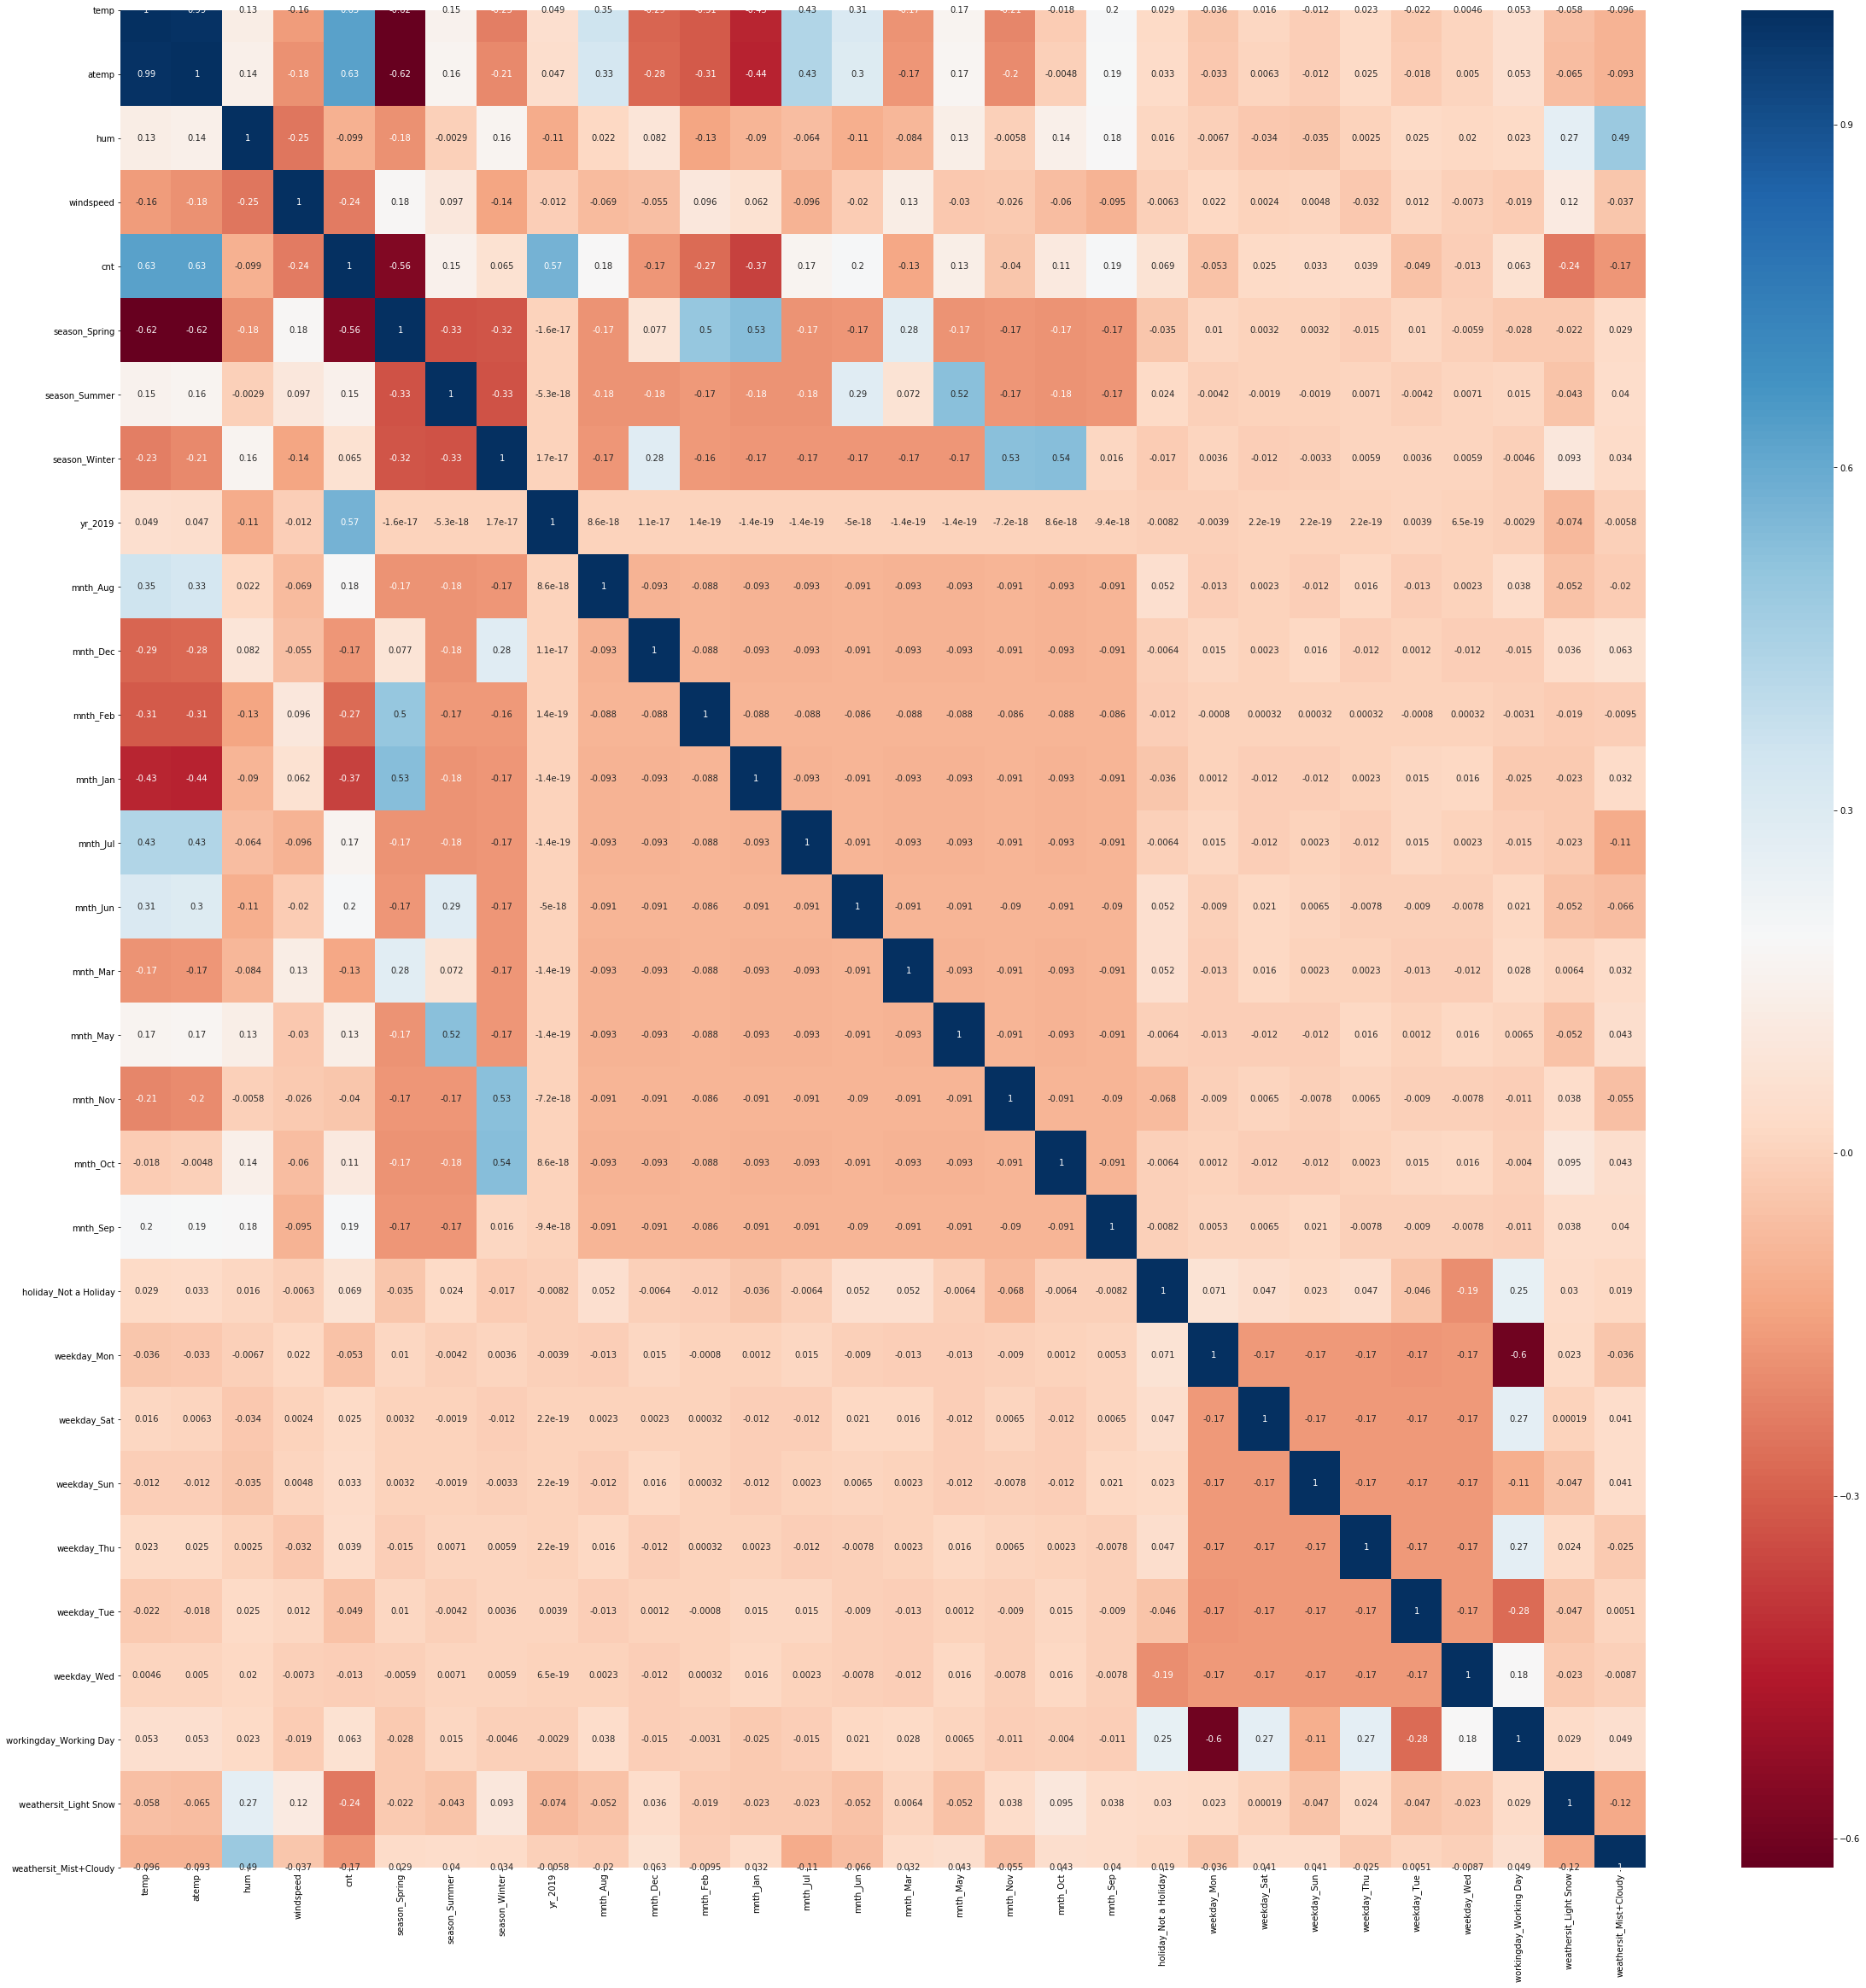

In [25]:
# plotting heatmap
plt.figure(figsize = (40,40))
sns.heatmap(df1.corr(),annot = True, cmap="RdBu")

### There is highly correlation between the temp and atemp columns and as per the given scenario temp is measured temperature and atemp is feels like temperature which are almost similar.

In [26]:
df1 = df1.drop(columns = ['atemp'],axis = 1)
df1.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Not a Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working Day,weathersit_Light Snow,weathersit_Mist+Cloudy
0,14.110847,80.5833,10.749882,985,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
1,14.902598,69.6087,16.652113,801,1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [27]:
# removing atemp from the numeric_colms list
numeric_colms.remove('atemp')

### Let us split the data into train and test set and start analysing the data based on few statistics metrics

In [28]:
df_train,df_test = train_test_split(df1,train_size = 0.7,random_state = 100)

In [29]:
df_train.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Not a Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working Day,weathersit_Light Snow,weathersit_Mist+Cloudy
576,29.246653,70.4167,11.083475,7216,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
426,16.980847,62.1250,10.792293,4066,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
728,10.489153,48.3333,23.500518,1796,1,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,0
482,15.443347,48.9583,8.708325,4220,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
111,13.803347,72.9583,14.707907,1683,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1


In [30]:
df_test.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Not a Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working Day,weathersit_Light Snow,weathersit_Mist+Cloudy
184,29.793347,63.7917,5.459106,6043,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
535,32.082500,59.2083,7.625404,6211,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
299,19.270000,81.2917,13.250121,2659,0,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,1
221,31.433347,42.4167,13.417286,4780,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
152,29.315000,30.5000,19.583229,4968,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


### Let us build the model using train dataset.

#### Normalizing the values using min max scaler

In [31]:
# initializing the object to the minmaxscaler
scaler = MinMaxScaler()
df_train[numeric_colms] = scaler.fit_transform(df_train[numeric_colms])
df_train.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Not a Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working Day,weathersit_Light Snow,weathersit_Mist+Cloudy
576,0.815169,0.725633,0.264686,0.827658,0,0,0,1,0,0,...,1,0,0,0,0,0,1,1,0,0
426,0.442393,0.640189,0.255342,0.465255,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
728,0.245101,0.498067,0.663106,0.204096,1,0,0,1,0,1,...,1,1,0,0,0,0,0,0,0,0
482,0.395666,0.504508,0.188475,0.482973,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
111,0.345824,0.751824,0.380981,0.191095,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1


### Dividing the train set into X and Y which are independant and dependant variables respectively

In [32]:
y_train = df_train.pop('cnt')
X_train = df_train

#### As we have 29 columns, we have to use Recursive feature elimination to remove half of the columns from it and then perform VIF and p value analysis on other columns

In [33]:
# performing RFE and removing 15 irrelvant columns that are affecting the analysis
lr = LinearRegression()
lr.fit(X_train, y_train)
rfe = RFE(lr, 15)
rfe = rfe.fit(X_train, y_train)

#### Checking the indepenadant variables and their ranking and support to understand which of then should be dropped

1. Columns which are ranked above 1 should be dropped.
2. Columns whose Support is False should be dropped.

In [34]:
#Creating a new data frame to show the Ranking and Support of the respective columns
RFE_Data = pd.DataFrame({'Variables' : X_train.columns, 'Ranking' : rfe.ranking_, 'Support' : rfe.support_})
RFE_Data.sort_values(['Ranking'], ascending = False)

,Variables,Ranking,Support
25,workingday_Working Day,14,False
13,mnth_Mar,13,False
20,weekday_Sat,12,False
22,weekday_Thu,11,False
16,mnth_Oct,10,False
12,mnth_Jun,9,False
21,weekday_Sun,8,False
24,weekday_Wed,7,False
7,mnth_Aug,6,False
14,mnth_May,5,False


#### Removing the respective columns in the dataset as discussed in the previous step 

In [35]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]

In [36]:
X_train_rfe.head()

,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Dec,mnth_Jan,mnth_Jul,mnth_Nov,mnth_Sep,holiday_Not a Holiday,weathersit_Light Snow,weathersit_Mist+Cloudy
576,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0,0,1,0,0
426,0.442393,0.640189,0.255342,1,0,0,1,0,0,0,0,0,1,0,1
728,0.245101,0.498067,0.663106,1,0,0,1,1,0,0,0,0,1,0,0
482,0.395666,0.504508,0.188475,0,1,0,1,0,0,0,0,0,1,0,1
111,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,0,1,0,1


### Checking Variance Inflation Factor for each of the remaining columns

In [37]:
# Creating a user defined function which returns dataframe which contains the Variable names and its VIF values for understanding to drop the necessary columns.
def VIF(X_train_rfe):
    vif = pd.DataFrame()
    vif['Columns'] = X_train_rfe.columns
    vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [38]:
# Creating a user defined function which returns the Summary of the independant variable after performing OLS method
def OLS_Summary(X_train_rfe):
    # Add a constant
    X_train_lr = sm.add_constant(X_train_rfe)
    lr = sm.OLS(y_train, X_train_lr).fit()
    return lr.summary()

### First Model

In [39]:
# Calculating VIF of the each independant variable
VIF(X_train_rfe)

,Columns,VIF
1,hum,33.97
12,holiday_Not a Holiday,26.66
0,temp,21.49
3,season_Spring,5.06
2,windspeed,4.98
5,season_Winter,4.39
4,season_Summer,3.09
14,weathersit_Mist+Cloudy,2.33
6,yr_2019,2.10
10,mnth_Nov,1.82


### Checking Summary of the model

In [40]:
OLS_Summary(X_train_rfe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Fri, 20 Aug 2021   Prob (F-statistic):          8.15e-189
Time:                        11:04:44   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2286      0.044      5.139      0.000       0.141       0.316
temp                       0.4815      0.037     13.005      0.000       0.409       0.554
hum                       -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed                 -0.1887      0.026     -7.315      0.000      -0.239      -0.138
season_Spring             -0.0613      0.021     -2.881      0.004      -0.103      -0.019
season_Summer              0.0423      0.015      2.761      0.006       0.012       0.072
season_Winter              0.1019      0.018      5.656      0.000       0.067       0.137
yr_2019                    0.2304      0.008     28.487      0.000       0.215       0.246
mnth_Dec                  -0.0355      0.018     -2.024      0.043      -0.070      -0.001
mnth_Jan                  -0.0434      0.018     -2.393      0.017      -0.079      -0.008
mnth_Jul                  -0.0553      0.018     -3.030      0.003      -0.091      -0.019
mnth_Nov                  -0.0387      0.019     -2.057      0.040      -0.076      -0.002
mnth_Sep                   0.0755      0.017      4.466      0.000       0.042       0.109
holiday_Not a Holiday      0.0911      0.026      3.557      0.000       0.041       0.141
weathersit_Light Snow     -0.2465      0.026     -9.331      0.000      -0.298      -0.195
weathersit_Mist+Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         26.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### From the above we can see that hum has high VIF, hence dropping the column from X_train_rfe

In [41]:
X_train_rfe = X_train_rfe.drop(columns = ['hum'], axis = 1)

### Second Model

In [42]:
# Checking VIF
VIF(X_train_rfe)

,Columns,VIF
11,holiday_Not a Holiday,24.24
0,temp,13.61
1,windspeed,4.84
2,season_Spring,4.24
4,season_Winter,3.70
3,season_Summer,2.78
5,yr_2019,2.08
9,mnth_Nov,1.79
7,mnth_Jan,1.71
8,mnth_Jul,1.60


In [43]:
#Checking Summary
OLS_Summary(X_train_rfe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Fri, 20 Aug 2021   Prob (F-statistic):          4.75e-186
Time:                        11:04:51   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.1533      0.042      3.686      0.000       0.072       0.235
temp                       0.4387      0.036     12.093      0.000       0.367       0.510
windspeed                 -0.1585      0.025     -6.276      0.000      -0.208      -0.109
season_Spring             -0.0713      0.021     -3.314      0.001      -0.113      -0.029
season_Summer              0.0349      0.015      2.251      0.025       0.004       0.065
season_Winter              0.0869      0.018      4.831      0.000       0.052       0.122
yr_2019                    0.2345      0.008     28.687      0.000       0.218       0.251
mnth_Dec                  -0.0428      0.018     -2.413      0.016      -0.078      -0.008
mnth_Jan                  -0.0500      0.018     -2.719      0.007      -0.086      -0.014
mnth_Jul                  -0.0500      0.019     -2.703      0.007      -0.086      -0.014
mnth_Nov                  -0.0395      0.019     -2.064      0.040      -0.077      -0.002
mnth_Sep                   0.0687      0.017      4.015      0.000       0.035       0.102
holiday_Not a Holiday      0.0918      0.026      3.522      0.000       0.041       0.143
weathersit_Light Snow     -0.2917      0.025    -11.840      0.000      -0.340      -0.243
weathersit_Mist+Cloudy    -0.0801      0.009     -9.198      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         24.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The column Holiday has high VIF and also has high p value hence choosing to drop the column

In [44]:
X_train_rfe = X_train_rfe.drop(columns = ['holiday_Not a Holiday'], axis = 1)

### Third Model

In [45]:
#Checking VIF
VIF(X_train_rfe)

,Columns,VIF
0,temp,5.17
1,windspeed,4.67
4,season_Winter,2.95
2,season_Spring,2.88
3,season_Summer,2.24
5,yr_2019,2.07
9,mnth_Nov,1.79
7,mnth_Jan,1.66
8,mnth_Jul,1.59
12,weathersit_Mist+Cloudy,1.56


In [46]:
#Checking Summary
OLS_Summary(X_train_rfe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.2
Date:                Fri, 20 Aug 2021   Prob (F-statistic):          1.49e-184
Time:                        11:04:58   Log-Likelihood:                 498.54
No. Observations:                 510   AIC:                            -969.1
Df Residuals:                     496   BIC:                            -909.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2461      0.033      7.563      0.000       0.182       0.310
temp                       0.4362      0.037     11.890      0.000       0.364       0.508
windspeed                 -0.1597      0.026     -6.255      0.000      -0.210      -0.110
season_Spring             -0.0749      0.022     -3.448      0.001      -0.118      -0.032
season_Summer              0.0343      0.016      2.186      0.029       0.003       0.065
season_Winter              0.0862      0.018      4.738      0.000       0.050       0.122
yr_2019                    0.2349      0.008     28.413      0.000       0.219       0.251
mnth_Dec                  -0.0439      0.018     -2.450      0.015      -0.079      -0.009
mnth_Jan                  -0.0513      0.019     -2.761      0.006      -0.088      -0.015
mnth_Jul                  -0.0491      0.019     -2.620      0.009      -0.086      -0.012
mnth_Nov                  -0.0476      0.019     -2.474      0.014      -0.085      -0.010
mnth_Sep                   0.0645      0.017      3.735      0.000       0.031       0.098
weathersit_Light Snow     -0.2886      0.025    -11.586      0.000      -0.337      -0.240
weathersit_Mist+Cloudy    -0.0786      0.009     -8.941      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       79.487   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              208.927
Skew:                          -0.776   Prob(JB):                     4.29e-46
Kurtosis:                       5.724   Cond. No.                         18.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### As we have seen in the pairplot there is linear correlation between the Temp and cnt, So Not Choosing to drop the temp column instead dropping season_Summer as it has high p value

In [47]:
X_train_rfe = X_train_rfe.drop(columns = ['season_Summer'], axis = 1)

### Fourth Model

In [48]:
#Check VIF
VIF(X_train_rfe)

,Columns,VIF
0,temp,4.66
1,windspeed,4.05
3,season_Winter,2.55
2,season_Spring,2.35
4,yr_2019,2.06
8,mnth_Nov,1.79
6,mnth_Jan,1.65
11,weathersit_Mist+Cloudy,1.53
5,mnth_Dec,1.46
7,mnth_Jul,1.36


In [49]:
#Checking Summary
OLS_Summary(X_train_rfe)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     207.4
Date:                Fri, 20 Aug 2021   Prob (F-statistic):          1.08e-184
Time:                        11:05:08   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -966.2
Df Residuals:                     497   BIC:                            -911.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0.2901      0.026     11.310      0.000       0.240       0.340
temp                       0.4000      0.033     12.171      0.000       0.335       0.465
windspeed                 -0.1550      0.026     -6.068      0.000      -0.205      -0.105
season_Spring             -0.1076      0.016     -6.812      0.000      -0.139      -0.077
season_Winter              0.0618      0.014      4.285      0.000       0.033       0.090
yr_2019                    0.2354      0.008     28.389      0.000       0.219       0.252
mnth_Dec                  -0.0506      0.018     -2.854      0.004      -0.085      -0.016
mnth_Jan                  -0.0569      0.018     -3.076      0.002      -0.093      -0.021
mnth_Jul                  -0.0635      0.018     -3.609      0.000      -0.098      -0.029
mnth_Nov                  -0.0548      0.019     -2.880      0.004      -0.092      -0.017
mnth_Sep                   0.0495      0.016      3.112      0.002       0.018       0.081
weathersit_Light Snow     -0.2906      0.025    -11.634      0.000      -0.340      -0.242
weathersit_Mist+Cloudy    -0.0783      0.009     -8.875      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       79.977   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.294
Skew:                          -0.767   Prob(JB):                     2.40e-48
Kurtosis:                       5.823   Cond. No.                         15.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIFs are less than 5 and p values are under control, so performing the Mulitple Linear regression on these remaining independant variables and checking the coefficients of each

In [50]:
#Adding constant and applying Linear Regression
X_train_lr = sm.add_constant(X_train_rfe)
lr_final = sm.OLS(y_train, X_train_lr).fit()
lr_final.params

const                     0.290080
temp                      0.399988
windspeed                -0.154994
season_Spring            -0.107626
season_Winter             0.061798
yr_2019                   0.235420
mnth_Dec                 -0.050640
mnth_Jan                 -0.056881
mnth_Jul                 -0.063476
mnth_Nov                 -0.054751
mnth_Sep                  0.049507
weathersit_Light Snow    -0.290648
weathersit_Mist+Cloudy   -0.078344
dtype: float64

### Inference

1. Temp has coefficient of 0.39 which says that 1 unit rise in temperature increase the bike rentals by 0.39 when all the other variables are not influenced
2. windspeed has a coefficient of -0.155 which says if there is unit increase in windspeed the bike rentals drop by 0.155 when all other variables are not influenced
3. Season_Spring has a coefficient of -0.107 which says if there is unit increase in Season_Spring the bike rentals drop by 0.107 when all other variables are not influenced
4. season_Winter has a coefficient of 0.06 which says if there is unit increase in season_Winter the bike rentals increase by 0.06 when all other variables are not influenced
5. yr has a coefficient of 0.23 which says if there is unit increase in yr the bike rentals increase by 0.23 when all other variables are not influenced
6. mnth_Dec has a coefficient of -0.05 which says if there is unit increase in mnth_Dec the bike rentals drop by 0.05 when all other variables are not influenced
7. mnth_Jan has a coefficient of -0.056 which says if there is unit increase in mnth_Jan the bike rentals drop by 0.056 when all other variables are not influenced
8. mnth_Jul has a coefficient of -0.063 which says if there is unit increase in mnth_Jul the bike rentals drop by 0.063 when all other variables are not influenced
9. mnth_Nov has a coefficient of -0.054 which says if there is unit increase in mnth_Nov the bike rentals drop by 0.054 when all other variables are not influenced
10. mnth_Sep has a coefficient of 0.049 which says if there is unit increase in mnth_Sep the bike rentals increase by 0.049 when all other variables are not influenced
11. weathersit_Light Snow has a coefficient of -0.29 which says if there is unit increase in weathersit_Light Snow the bike rentals drop by 0.29 when all other variables are not influenced
12. weathersit_Mist+Cloudy has a coefficient of -0.078 which says if there is unit increase in weathersit_Mist+Cloudy the bike rentals drop by 0.078 when all other variables are not influenced
13. The Constant value of 0.29 indicated that, in the absence of all other predictor variables, The bike rental can still increase by 0.29 units.

#### The Equation for the problem goes like this

cnt = 0.29 + 0.40(temp)-0.155(windspeed)-0.107(Season_spring)+0.06(Season_Winter)+0.23(yr)-0.05(mnth_Dec)-0.056(mnth_Jan)
-0.063(mnth_Jul)-0.054(mnth_Nov)+0.049(mnth_Sep)-0.29(weathersit_Light Snow)-0.078(weathersit_Mist+Cloudy)

Text(0.5, 1.0, 'Distribution of Residuals')

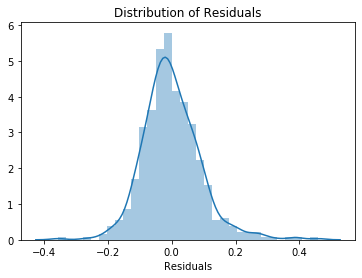

In [51]:
# Checking for Normality
y_train_predict = lr_final.predict(X_train_lr) # Predicting the train data
sns.distplot(y_train_predict-y_train) # Plotting the distribution plot of the residuals
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')

#### The Residuals are normally distributed and with mean of 0, Hence Normality is addressed

In [52]:
# Checking the MultiCollinearity using VIF
VIF(X_train_rfe)

,Columns,VIF
0,temp,4.66
1,windspeed,4.05
3,season_Winter,2.55
2,season_Spring,2.35
4,yr_2019,2.06
8,mnth_Nov,1.79
6,mnth_Jan,1.65
11,weathersit_Mist+Cloudy,1.53
5,mnth_Dec,1.46
7,mnth_Jul,1.36


#### The VIF values are not greater than 5. Hence MultiCollinearity is Addressed

#### Checking the metrics for the Test Data

Text(0, 0.5, 'y_train_pred')

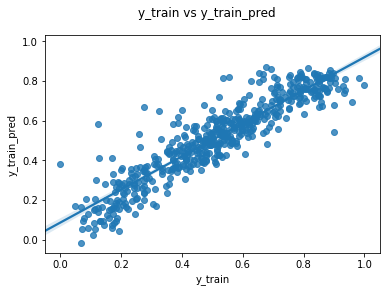

In [53]:
plt.figure().suptitle('y_train vs y_train_pred')
sns.regplot(y_train,y_train_predict)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')

In [54]:
# Printing R2 Score of train Data
print('R2 score for the Train Data : ',r2_score(y_train,y_train_predict))

R2 score for the Train Data :  0.8335269005188917


In [55]:
# Printing Adjusted R2 Score of train Data
N = X_train_rfe.shape[0] # N is number of rows extracted from the shape tuple of X_train_rfe
P = X_train_rfe.shape[1] # P is number of columns extracted from the shape tuple of X_train_rfe
print('Adjusted R2 score for the Train Data : ',1- (1-r2_score(y_train,y_train_predict))*(N-1)/(N-P-1))

Adjusted R2 score for the Train Data :  0.8295074293040561


#### R2 score and Adjusted R2 Score are almost similar hence the problem of number of independant columns is addressed

### Checking Performance on the test data

In [56]:
# Scaling the test dataset using the min max scaler which was used for the train set
df_test[numeric_colms] = scaler.transform(df_test[numeric_colms])

In [57]:
df_test.head()

,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,yr_2019,mnth_Aug,mnth_Dec,...,holiday_Not a Holiday,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,workingday_Working Day,weathersit_Light Snow,weathersit_Mist+Cloudy
184,0.831783,0.657364,0.084219,0.692706,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
535,0.901354,0.610133,0.153728,0.712034,0,1,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
299,0.511964,0.837699,0.334206,0.303382,0,0,1,0,0,0,...,1,0,1,0,0,0,0,1,0,1
221,0.881625,0.437098,0.339570,0.547400,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
152,0.817246,0.314298,0.537414,0.569029,0,1,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0


In [58]:
# Separating X_test and y_test from df_test
y_test = df_test.pop('cnt') 
X_test = df_test

In [59]:
# Removing all the columns that are not present in X_train_rfe
X_test = X_test[X_train_rfe.columns]

In [60]:
# Adding Constant before performing the OLS
X_test_lr = sm.add_constant(X_test)

In [61]:
# Predicting the X_test set values and storing in y_test_predict
y_test_pred = lr_final.predict(X_test_lr)

Text(0, 0.5, 'y_test_pred')

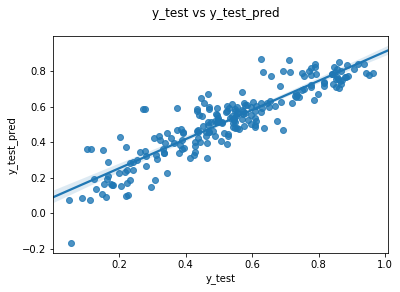

In [62]:
# Plotting the regression plot for y-test_pred and y_test
plt.figure().suptitle('y_test vs y_test_pred')
sns.regplot(y_test,y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [63]:
# Checking R2 Score for the test Data
print('The R2 Score for the test data using the lr_final model',r2_score(y_test, y_test_pred))

The R2 Score for the test data using the lr_final model 0.8168625651669512


#### Inference

81.6% of the variance in the test data can be explained by this model.

### Results:

1. R2 Score for Train Data achieved is 0.833
2. Adjusted R2 Score for Train Data achieved is 0.829
3. R2 Score for the Test Data is 0.81

This Seems to be a good model that can generalize on the unseen data which is test data in this case.

### Conclusions:

#### Highly Influencing Variables:

Temp, weathersit_Light Snow , yr are the variables that are highly Influencial, as the coefficients are higher when compared to other variables. The suggestion is to consider this variables while planning to optimize the bike rentals plan.

#### Moderately Influencing Variables:

Wind_speed and Season_spring are moderately influencing the variables, these have coefficients little lower than the Highly Influencial Variables

Rest of the variables are also influenced but the above 5 variables are must considering while planning for optimization.
